In [37]:
import pandas as pd
from datetime import datetime, timedelta
import random

# Parâmetros de configuração
num_interacoes = 20
num_ligacoes = 5

# Definir timestamps de início e fim da chamada
inicio_chamada = datetime(2023, 7, 12, 9, 0)
fim_chamada = datetime(2023, 7, 12, 10, 0)

# Gerar IDs de ligação
ids_ligacao = list(range(1, num_ligacoes + 1))

# Criar DataFrame de interações
df = pd.DataFrame(columns=['id_ligacao', 'falante', 'tempo_inicio', 'tempo_fim'])

for id_ligacao in ids_ligacao:
    # Gerar timestamps aleatórios dentro do intervalo da chamada
    timestamps = []
    for _ in range(num_interacoes):
        random_time = inicio_chamada + timedelta(seconds=random.randint(0, int((fim_chamada - inicio_chamada).total_seconds())))
        timestamps.append(random_time)

    # Selecionar apenas 5 timestamps aleatórios
    random_timestamps = random.sample(timestamps, num_interacoes // 2 * 2)

    # Criar dados para a ligação atual
    data = {
        'id_ligacao': [id_ligacao] * num_interacoes,
        'falante': ['Atendente', 'Cliente'] * (num_interacoes // 2),
        'tempo_inicio': random_timestamps,
        'tempo_fim': random_timestamps[1:] + [fim_chamada],
    }

    # Adicionar os dados ao DataFrame principal
    df = df.append(pd.DataFrame(data), ignore_index=True)

# Ordenar o DataFrame pelo ID da ligação
df = df.sort_values('id_ligacao')

# Reiniciar o índice
df = df.reset_index(drop=True)

# Exibição do DataFrame ordenado
print(df)


   id_ligacao    falante        tempo_inicio           tempo_fim
0           1  Atendente 2023-07-12 09:53:26 2023-07-12 09:27:46
1           1    Cliente 2023-07-12 09:45:35 2023-07-12 10:00:00
2           1  Atendente 2023-07-12 09:53:07 2023-07-12 09:45:35
3           1    Cliente 2023-07-12 09:57:48 2023-07-12 09:53:07
4           1  Atendente 2023-07-12 09:00:41 2023-07-12 09:57:48
..        ...        ...                 ...                 ...
95          5    Cliente 2023-07-12 09:58:42 2023-07-12 09:32:25
96          5  Atendente 2023-07-12 09:50:09 2023-07-12 09:58:42
97          5  Atendente 2023-07-12 09:21:51 2023-07-12 09:11:05
98          5  Atendente 2023-07-12 09:02:26 2023-07-12 09:35:45
99          5    Cliente 2023-07-12 09:11:05 2023-07-12 10:00:00

[100 rows x 4 columns]


/tmp/ipykernel_32/1393994421.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data), ignore_index=True)
/tmp/ipykernel_32/1393994421.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data), ignore_index=True)
/tmp/ipykernel_32/1393994421.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data), ignore_index=True)
/tmp/ipykernel_32/1393994421.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data), ignore_index=True)
/tmp/ipykernel_32/1393994421.py:38: FutureWarning: The frame.append method is deprecated and will be

In [38]:
import pandas as pd

# Obter as informações dos índices específicos
index_1 = 1
index_2 = 2

# Obter os tempos de início e fim dos índices específicos
tempo_inicio_1 = df.loc[index_1, 'tempo_inicio']
tempo_fim_1 = df.loc[index_1, 'tempo_fim']
tempo_inicio_2 = df.loc[index_2, 'tempo_inicio']
tempo_fim_2 = df.loc[index_2, 'tempo_fim']

# Calcular o tempo de espera entre os índices
tempo_espera = tempo_inicio_2 - tempo_fim_1

# Exibir o resultado
print(f"Tempo de espera entre os índices {index_1} e {index_2}: {tempo_espera}")


Tempo de espera entre os índices 1 e 2: -1 days +23:53:07


In [39]:
# def calcular_tempo_espera(df):
#     df['tempo_espera'] = (df['tempo_inicio'].shift(-1) - df['tempo_fim']).dt.total_seconds()

#     # Calcular o tempo total de espera para a mesma ligação
#     tempo_total_espera = df['tempo_espera'].sum()

#     # Calcular o percentual de espera em relação ao tempo total de espera
#     df['percentual_espera'] = (df['tempo_espera'] / tempo_total_espera) * 100
#     df['percentual_espera'] = df['percentual_espera'].abs()

#     return df


In [40]:
def calcular_tempo_espera(df):
    # Agrupar por id_ligacao
    grouped_df = df.groupby('id_ligacao')

    # Calcular o tempo de espera para cada ligação
    df['tempo_espera'] = grouped_df['tempo_inicio'].shift(-1) - df['tempo_fim']
    df['tempo_espera'] = df['tempo_espera'].dt.total_seconds()

    # Calcular o tempo total de espera para cada ligação
    df['tempo_total_espera'] = grouped_df['tempo_espera'].transform('sum')

    # Calcular o percentual de espera para cada ligação
    df['percentual_espera'] = (df['tempo_espera'] / df['tempo_total_espera']) * 100
    df['percentual_espera'] = df['percentual_espera'].abs()

    return df


In [41]:
df = calcular_tempo_espera(df)

In [42]:
 df.loc[(df.id_ligacao == 1)] 

,id_ligacao,falante,tempo_inicio,tempo_fim,tempo_espera,tempo_total_espera,percentual_espera
0,1,Atendente,2023-07-12 09:53:26,2023-07-12 09:27:46,1069.0,-985.0,108.527919
1,1,Cliente,2023-07-12 09:45:35,2023-07-12 10:00:00,-413.0,-985.0,41.928934
2,1,Atendente,2023-07-12 09:53:07,2023-07-12 09:45:35,733.0,-985.0,74.416244
3,1,Cliente,2023-07-12 09:57:48,2023-07-12 09:53:07,-3146.0,-985.0,319.390863
4,1,Atendente,2023-07-12 09:00:41,2023-07-12 09:57:48,-1476.0,-985.0,149.847716
5,1,Cliente,2023-07-12 09:33:12,2023-07-12 09:00:41,479.0,-985.0,48.629442
6,1,Cliente,2023-07-12 09:08:40,2023-07-12 09:39:09,704.0,-985.0,71.472081
7,1,Atendente,2023-07-12 09:50:53,2023-07-12 09:08:40,220.0,-985.0,22.335025
8,1,Cliente,2023-07-12 09:12:20,2023-07-12 09:50:53,-438.0,-985.0,44.467005
9,1,Atendente,2023-07-12 09:43:35,2023-07-12 09:12:20,1609.0,-985.0,163.350254


In [43]:
 df.loc[(df.id_ligacao == 2)] 

,id_ligacao,falante,tempo_inicio,tempo_fim,tempo_espera,tempo_total_espera,percentual_espera
20,2,Atendente,2023-07-12 09:14:04,2023-07-12 09:36:30,0.0,-2681.0,0.000000
21,2,Cliente,2023-07-12 09:36:30,2023-07-12 09:12:12,0.0,-2681.0,0.000000
22,2,Atendente,2023-07-12 09:12:12,2023-07-12 09:55:58,0.0,-2681.0,0.000000
23,2,Cliente,2023-07-12 09:55:58,2023-07-12 09:24:35,870.0,-2681.0,32.450578
24,2,Cliente,2023-07-12 09:39:05,2023-07-12 10:00:00,-3517.0,-2681.0,131.182395
25,2,Cliente,2023-07-12 09:01:23,2023-07-12 09:08:46,0.0,-2681.0,0.000000
26,2,Atendente,2023-07-12 09:08:46,2023-07-12 09:39:05,-1846.0,-2681.0,68.854905
27,2,Cliente,2023-07-12 09:08:19,2023-07-12 09:14:04,631.0,-2681.0,23.535994
28,2,Atendente,2023-07-12 09:24:35,2023-07-12 09:01:23,719.0,-2681.0,26.818351
29,2,Atendente,2023-07-12 09:13:22,2023-07-12 09:08:19,-329.0,-2681.0,12.271540


In [44]:
 df.loc[(df.id_ligacao == 3)] 

,id_ligacao,falante,tempo_inicio,tempo_fim,tempo_espera,tempo_total_espera,percentual_espera
40,3,Atendente,2023-07-12 09:40:52,2023-07-12 09:50:54,0.0,832.0,0.000000
41,3,Cliente,2023-07-12 09:50:54,2023-07-12 09:42:34,0.0,832.0,0.000000
42,3,Atendente,2023-07-12 09:42:34,2023-07-12 09:14:47,0.0,832.0,0.000000
43,3,Cliente,2023-07-12 09:14:47,2023-07-12 09:40:09,528.0,832.0,63.461538
44,3,Cliente,2023-07-12 09:48:57,2023-07-12 10:00:00,-86.0,832.0,10.336538
45,3,Cliente,2023-07-12 09:58:34,2023-07-12 09:27:54,0.0,832.0,0.000000
46,3,Atendente,2023-07-12 09:27:54,2023-07-12 09:48:57,634.0,832.0,76.201923
47,3,Cliente,2023-07-12 09:59:31,2023-07-12 09:40:52,-43.0,832.0,5.168269
48,3,Atendente,2023-07-12 09:40:09,2023-07-12 09:58:34,-3157.0,832.0,379.447115
49,3,Atendente,2023-07-12 09:05:57,2023-07-12 09:59:31,-1899.0,832.0,228.245192


In [45]:
# Criar tabela final sem os valores NaN
df_final_dropna = df.dropna().reset_index(drop=True)

# Exibir a tabela final sem os valores NaN
print(df_final_dropna)

   id_ligacao    falante        tempo_inicio           tempo_fim  \
0           1  Atendente 2023-07-12 09:53:26 2023-07-12 09:27:46   
1           1    Cliente 2023-07-12 09:45:35 2023-07-12 10:00:00   
2           1  Atendente 2023-07-12 09:53:07 2023-07-12 09:45:35   
3           1    Cliente 2023-07-12 09:57:48 2023-07-12 09:53:07   
4           1  Atendente 2023-07-12 09:00:41 2023-07-12 09:57:48   
..        ...        ...                 ...                 ...   
90          5  Atendente 2023-07-12 09:32:25 2023-07-12 09:37:57   
91          5    Cliente 2023-07-12 09:58:42 2023-07-12 09:32:25   
92          5  Atendente 2023-07-12 09:50:09 2023-07-12 09:58:42   
93          5  Atendente 2023-07-12 09:21:51 2023-07-12 09:11:05   
94          5  Atendente 2023-07-12 09:02:26 2023-07-12 09:35:45   

    tempo_espera  tempo_total_espera  percentual_espera  
0         1069.0              -985.0         108.527919  
1         -413.0              -985.0          41.928934  
2        

# Tempo de espera Geral

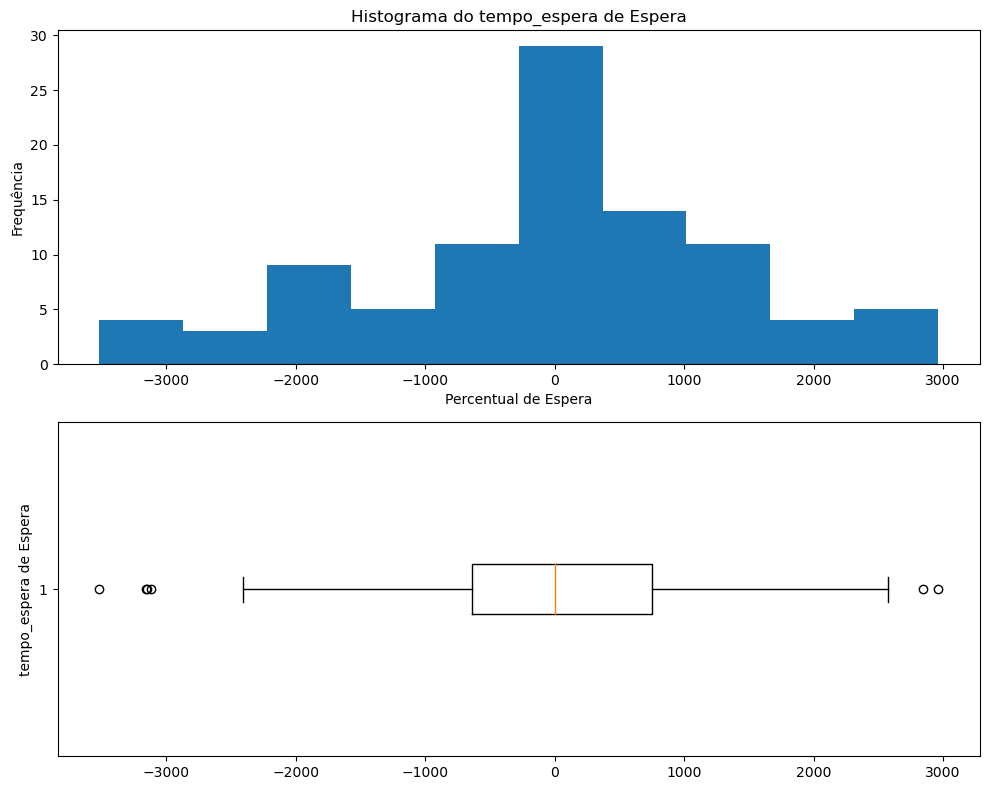

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar figura e eixos
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Histograma
axs[0].hist(df_final_dropna['tempo_espera'], bins=10)
axs[0].set_xlabel('Percentual de Espera')
axs[0].set_ylabel('Frequência')
axs[0].set_title('Histograma do tempo_espera de Espera')

# Boxplot horizontal
axs[1].boxplot(df_final_dropna['tempo_espera'], vert=False)
axs[1].set_ylabel('tempo_espera de Espera')
axs[1].set_xlabel('')

# Ajustar espaçamento entre subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()


# Percentual de Espera Geral

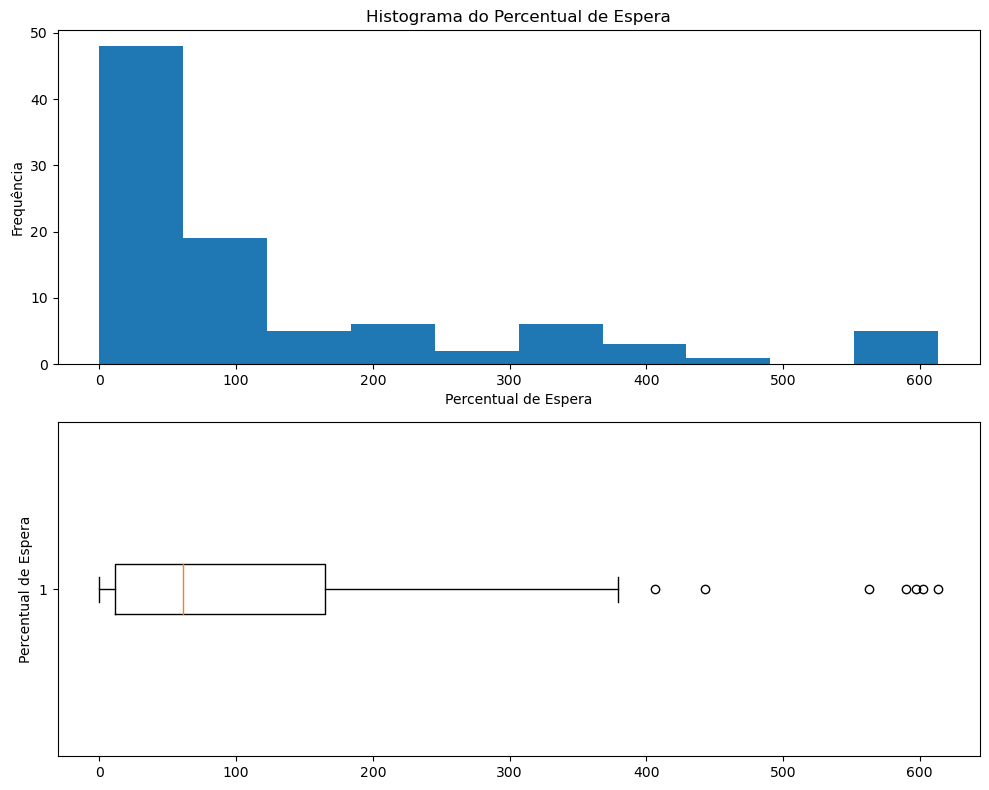

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar figura e eixos
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Histograma
axs[0].hist(df_final_dropna['percentual_espera'], bins=10)
axs[0].set_xlabel('Percentual de Espera')
axs[0].set_ylabel('Frequência')
axs[0].set_title('Histograma do Percentual de Espera')

# Boxplot horizontal
axs[1].boxplot(df_final_dropna['percentual_espera'], vert=False)
axs[1].set_ylabel('Percentual de Espera')
axs[1].set_xlabel('')

# Ajustar espaçamento entre subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()


# Tempo de Espera por ligação

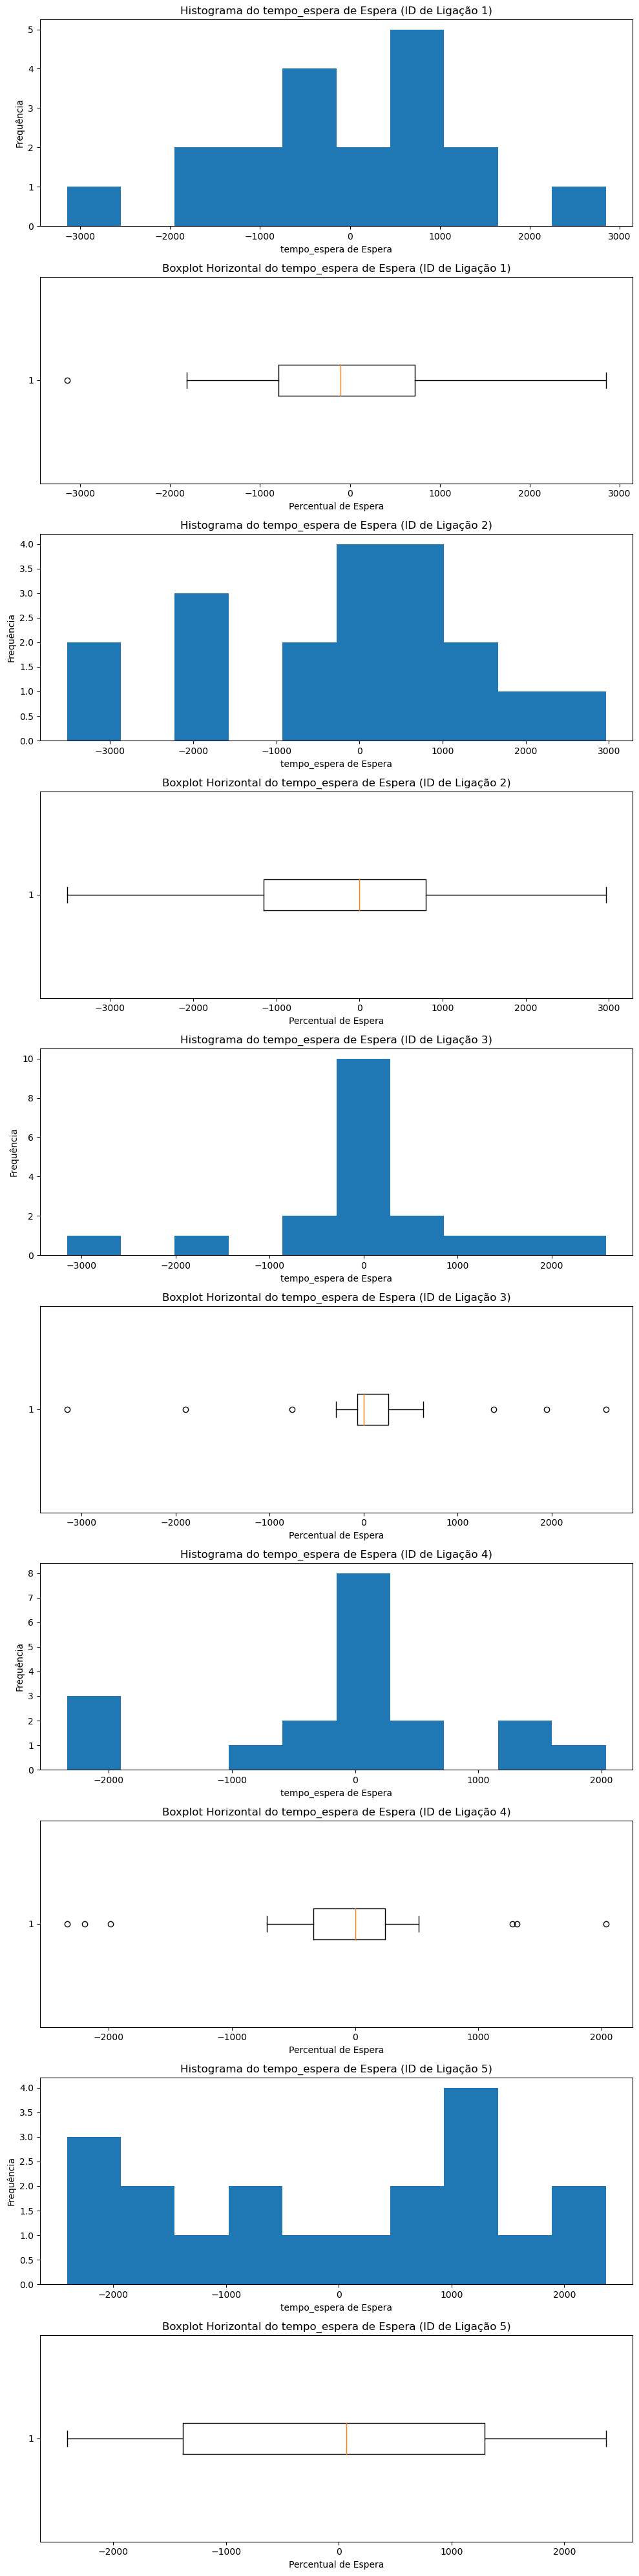

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obter a lista de IDs de ligação únicos
ids_ligacao = df_final_dropna['id_ligacao'].unique()

# Criar figura e eixos
fig, axs = plt.subplots(2 * len(ids_ligacao), 1, figsize=(10, 8 * len(ids_ligacao)))

# Loop pelos IDs de ligação
for i, id_ligacao in enumerate(ids_ligacao):
    # Filtrar o DataFrame para o ID de ligação atual
    df_ligacao = df_final_dropna[df_final_dropna['id_ligacao'] == id_ligacao]
    
    # Histograma
    axs[2*i].hist(df_ligacao['tempo_espera'], bins=10)
    axs[2*i].set_xlabel('tempo_espera de Espera')
    axs[2*i].set_ylabel('Frequência')
    axs[2*i].set_title(f'Histograma do tempo_espera de Espera (ID de Ligação {id_ligacao})')

    # Boxplot horizontal
    axs[2*i+1].boxplot(df_ligacao['tempo_espera'], vert=False)
    axs[2*i+1].set_xlabel('Percentual de Espera')
    axs[2*i+1].set_ylabel('')
    axs[2*i+1].set_title(f'Boxplot Horizontal do tempo_espera de Espera (ID de Ligação {id_ligacao})')

# Ajustar espaçamento entre subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()


# Percentual de espera por ligação

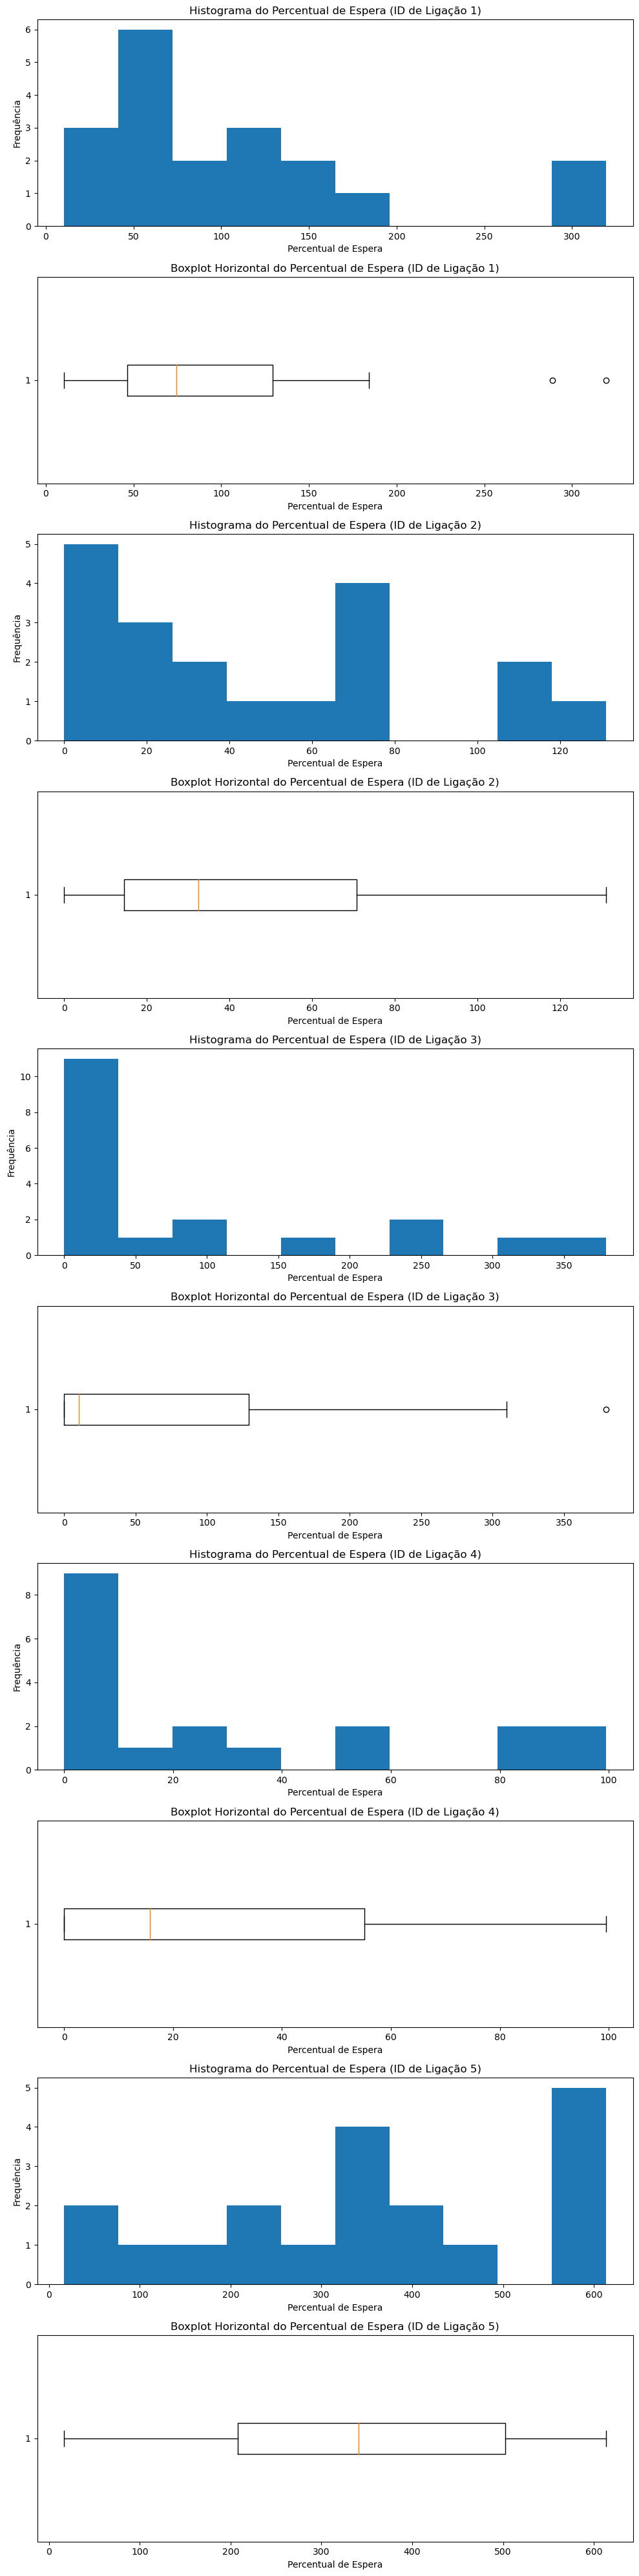

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obter a lista de IDs de ligação únicos
ids_ligacao = df_final_dropna['id_ligacao'].unique()

# Criar figura e eixos
fig, axs = plt.subplots(2 * len(ids_ligacao), 1, figsize=(10, 8 * len(ids_ligacao)))

# Loop pelos IDs de ligação
for i, id_ligacao in enumerate(ids_ligacao):
    # Filtrar o DataFrame para o ID de ligação atual
    df_ligacao = df_final_dropna[df_final_dropna['id_ligacao'] == id_ligacao]
    
    # Histograma
    axs[2*i].hist(df_ligacao['percentual_espera'], bins=10)
    axs[2*i].set_xlabel('Percentual de Espera')
    axs[2*i].set_ylabel('Frequência')
    axs[2*i].set_title(f'Histograma do Percentual de Espera (ID de Ligação {id_ligacao})')

    # Boxplot horizontal
    axs[2*i+1].boxplot(df_ligacao['percentual_espera'], vert=False)
    axs[2*i+1].set_xlabel('Percentual de Espera')
    axs[2*i+1].set_ylabel('')
    axs[2*i+1].set_title(f'Boxplot Horizontal do Percentual de Espera (ID de Ligação {id_ligacao})')

# Ajustar espaçamento entre subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()


In [50]:
def generate_readme(df):
    # Abrir o arquivo README.md em modo de escrita
    with open('README.md', 'w') as f:
        # Escrever o título do projeto
        f.write('# Projeto de Análise de Tempo de Espera\n\n')

        # Escrever a descrição do projeto
        f.write('Este projeto analisa o tempo de espera entre interações em uma chamada telefônica.\n\n')

        # Escrever informações sobre o DataFrame
        f.write('## DataFrame\n\n')
        f.write('O DataFrame utilizado contém as seguintes colunas:\n\n')
        f.write('- `id_ligacao`: ID da ligação telefônica\n')
        f.write('- `falante`: Papel do participante da chamada (Atendente ou Cliente)\n')
        f.write('- `tempo_inicio`: Tempo de início da interação\n')
        f.write('- `tempo_fim`: Tempo de fim da interação\n')
        f.write('- `tempo_espera`: Tempo de espera entre as interações\n')
        f.write('- `percentual_espera`: Percentual de espera em relação ao tempo total de espera\n\n')

        # Escrever informações sobre o cálculo do tempo de espera
        f.write('## Cálculo do Tempo de Espera\n\n')
        f.write('O tempo de espera é calculado utilizando a função `calcular_tempo_espera` que realiza as seguintes etapas:\n\n')
        f.write('- Calcula o tempo de espera entre as interações\n')
        f.write('- Calcula o tempo total de espera para a mesma ligação\n')
        f.write('- Calcula o percentual de espera em relação ao tempo total de espera\n\n')

        # Exibir o DataFrame resultante
        f.write('## DataFrame Resultante\n\n')
        f.write('Aqui estão as primeiras linhas do DataFrame resultante:\n\n')
        f.write('```python\n')
        f.write(df.head().to_string(index=False))
        f.write('\n```\n')

        # Escrever informações adicionais, se necessário
        f.write('## Informações Adicionais\n\n')
        f.write('Adicione informações adicionais sobre o projeto ou análises realizadas aqui.\n')

    # Mensagem de confirmação
    print('Arquivo README.md gerado com sucesso!')

# Gerar o arquivo README.md com base no DataFrame resultante
generate_readme(df_final_dropna)


Arquivo README.md gerado com sucesso!
